***MIRUDHULA D***

***212221230060***


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

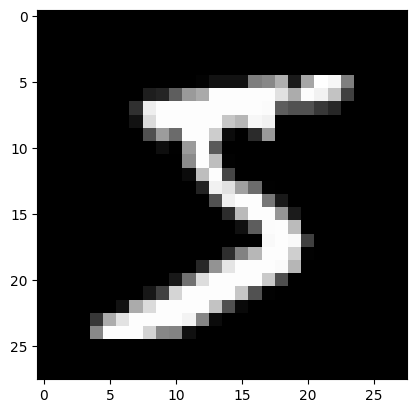

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

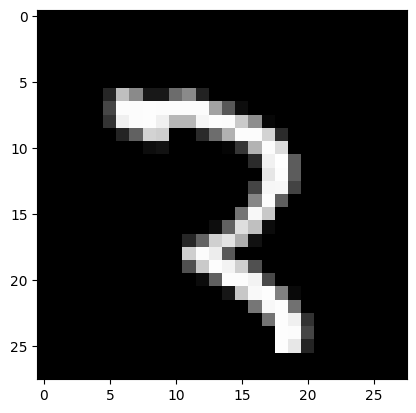

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: Mirudhula D

Register Number:212221230060

In [22]:

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8507 - loss: 0.4907 - val_accuracy: 0.9747 - val_loss: 0.0850
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9764 - loss: 0.0774 - val_accuracy: 0.9810 - val_loss: 0.0599
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9848 - loss: 0.0517 - val_accuracy: 0.9812 - val_loss: 0.0594
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9804 - val_loss: 0.0571
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9827 - val_loss: 0.0585


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.928350,0.237901,0.9747,0.084977
1,0.977633,0.073200,0.9810,0.059894
2,0.984567,0.050870,0.9812,0.059379
3,0.988400,0.037729,0.9804,0.057092
4,0.989983,0.031351,0.9827,0.058546


<Axes: >

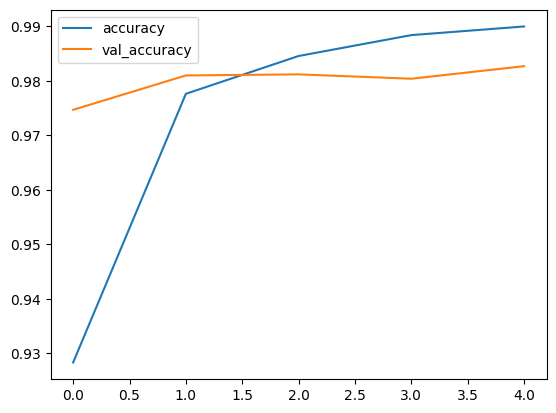

In [29]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

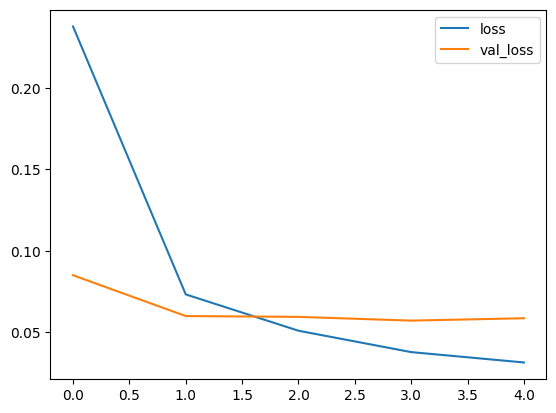

In [30]:
metrics[['loss','val_loss']].plot()

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [32]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    0    0    0    0    1    1    1    1]
 [   0 1123    2    0    0    1    8    1    0    0]
 [   4    0 1011    2    3    0    2    6    4    0]
 [   1    0    1  994    0    4    0    4    5    1]
 [   1    0    0    0  976    0    4    0    0    1]
 [   2    0    1    4    0  878    5    0    2    0]
 [   7    1    0    0    2    1  947    0    0    0]
 [   0    1    7    0    1    0    0 1017    1    1]
 [   4    1    3    0    3    0    2    3  956    2]
 [   4    2    0    1   13   12    0   13   15  949]]


In [33]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



Mirudhula D
212221230060


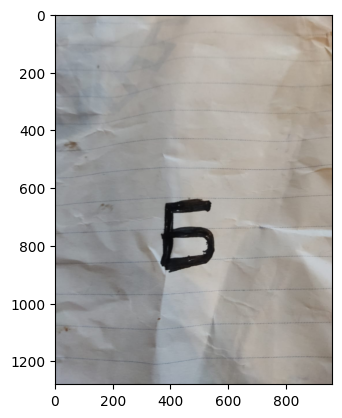

In [53]:
img = image.load_img('/content/n3.jpeg')
plt.imshow(img,cmap='gray')
print("Mirudhula D")
print("212221230060")

In [45]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [46]:
img = image.load_img('/content/n3.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [47]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [48]:
print("Mirudhula D")
print("212221230060")
print(x_single_prediction)

Mirudhula D
212221230060
[6]


Mirudhula D
212221230060


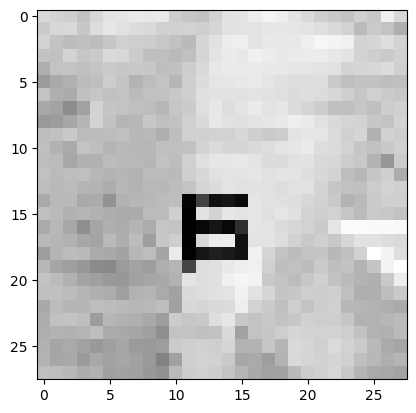

In [54]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("Mirudhula D")
print("212221230060")

In [50]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [51]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [52]:
print("Mirudhula D")
print("212221230060")
print(x_single_prediction)

Mirudhula D
212221230060
[6]
